In [1]:
# 합성곱 연산
from scipy.signal import convolve
import numpy as np
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [2]:
# 실제 딥러닝에서는 합성곱 연산이 아닌 교차상관 연산을 사용합니다.
# 이는 어차피 모델 초기화 과정에서 가중치 배열은 무작위로 초기화하기 때문에 뒤집는 것이 큰 의미가 
# 없습니다.
import numpy as np
from scipy.signal import correlate

x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [3]:
# full padding의 사용
from scipy.signal import correlate
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [4]:
# same padding의 사용
from scipy.signal import correlate
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [5]:
# 2차원 배열의 합성곱
import numpy as np
from scipy.signal import correlate2d
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0],
              [0, 0]])
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [6]:
import numpy as np
from scipy.signal import correlate2d
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0],
              [0, 0]])
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


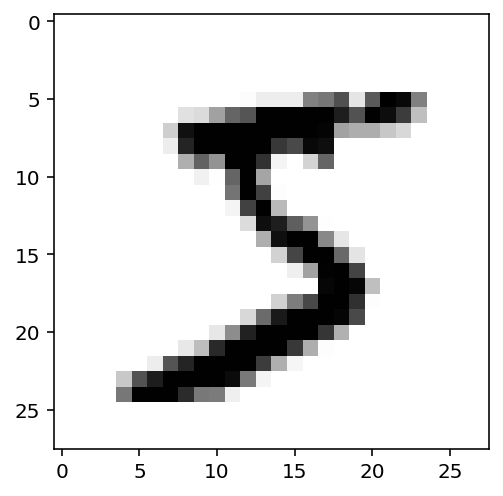

In [1]:
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

plt.imshow(x_train[0], cmap="gray_r")
plt.show()

In [2]:
import tensorflow.keras as keras
# 데이터 전처리

# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# (60000, 28, 28) => (60000, 28, 28, 1)로 reshape
# 텐서플로는 이미지를 폭, 너비, 채널로 해석합니다.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = Sequential()

# 합성곱층
model.add(Conv2D(32, # 필터 또는 커널 갯수
                 kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# 풀링층
model.add(MaxPooling2D(pool_size=2))

# 완전 연결층
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dense(10, activation='softmax'))

# 학습 및 평가
SGD = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=SGD,
              loss="categorical_crossentropy", metrics=["categorical_accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print(result[1]*100)

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3904 - categorical_accuracy: 0.8850
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1576 - categorical_accuracy: 0.9529
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1125 - categorical_accuracy: 0.9658
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0884 - categorical_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0710 - categorical_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0596 - categorical_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0492 - categorical_accuracy: 0.9850
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0431 - categorical_accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - 